In this project, we willl analyze various movie review websites using "fandango_score_comparison.csv" We will use descriptive statistics to draw comparisons between fandango and other review websites. In addition, we'll also use linear regression to determine fandango review scores based on other review scores.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

movies = pd.read_csv('fandango_score_comparison.csv')
movies.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


First, we'll use a histogram to see the distribution of ratings for "Fandango_Stars" and "Metacritic_norm_round".

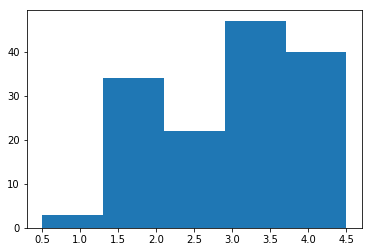

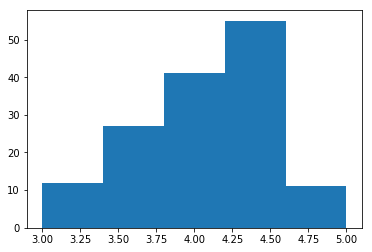

In [2]:
mc = movies['Metacritic_norm_round']
fd = movies['Fandango_Stars']

plt.hist(mc, 5)
plt.show()

plt.hist(fd, 5)
plt.show()

It looks like fandango seems to have higher overalll ratings than metacritic, but just looking at histograms isn't enough to prove that. We can calclate the mean, median, and standard deviation of the two websites using numpy functions.  

In [3]:
mean_fd = fd.mean()
mean_mc = mc.mean()
median_fd = fd.median()
median_mc = mc.median()
std_fd = fd.std()
std_mc = mc.std()

print("means", mean_fd, mean_mc)
print("medians",median_fd, median_mc)
print("std_devs",std_fd, std_mc)

means 4.08904109589 2.97260273973
medians 4.0 3.0
std_devs 0.540385977979 0.990960561374


Couple of things to note here:

+ Fandango rating methods are hidden, where as metacritic takes a weighted average of all the published critic scores.

+ The mean and the median for fandango is way higher, they also got a low std deviation. I'd imagine their scores are influenced by studios and have inflated scores to get people on the website to watch the movies.

+ The standard deviation for fandango is also lower because most of their ratings are clustered on the high side.

+ Metacritic on the other hand has a median of 3.0 and an average of 3 which is basically what you would expect from a normal distribution.

Let's make a scatter plot between fandango and metacritic to see if we can draw any correlations.

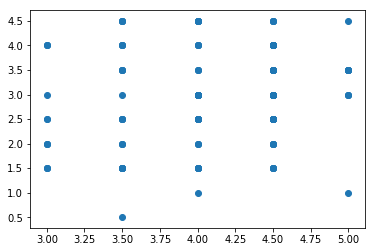

In [4]:
plt.scatter(fd, mc)
plt.show()

In [5]:
movies['fm_diff'] = fd - mc
movies['fm_diff'] = np.absolute(movies['fm_diff'])
dif_sort = movies['fm_diff'].sort_values(ascending=False)

movies.sort_values(by='fm_diff', ascending = False).head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


It looks like the difference can get as high as 4.0 or 3.0. We should try to calculate the correlation between the two websites. We can do this by simply using the .pearsonr() function from scipy.

In [6]:
import scipy.stats as sci

r, pearsonr = sci.pearsonr(mc, fd)
print(r)
print(pearsonr)

0.178449190739
0.0311615162285


If both movie review sites uses the similar methods for rating their movies, we should see a strong correlation. A low correlation tells us that these two websites have very different review methods.

Doing a linear regression wouldn't be very accurate with a low correlation. However, let's do it for the sake of practice anyway.

In [7]:
m, b, r, p, stderr = sci.linregress(mc, fd)

#Fit into a line, y = mx+b where x is 3.
pred_3 = m*3 + b
pred_3

4.0917071528212041

In [8]:
pred_1 = m*1 + b
print(pred_1)
pred_5 = m*5 + b
print(pred_5)

3.89708499687
4.28632930877


We can make predictions of what the fandango score is based on the metacritic score by doing a linear regression. However it is important to keep in mind, if the correlation is low, the model might not be very accurate.

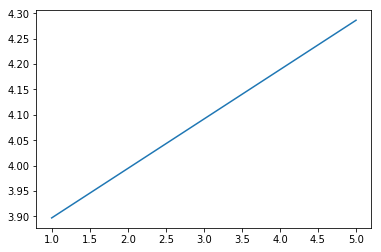

In [18]:
x_pred = [1.0, 5.0]
y_pred = [3.89708499687, 4.28632930877]

plt.plot(x_pred, y_pred)



plt.show()

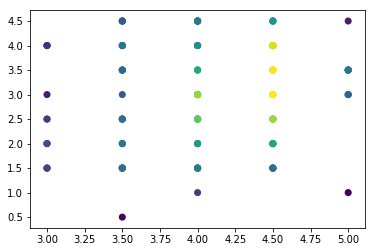

In [20]:
from scipy.stats import gaussian_kde

# Calculate the point density
xy = np.vstack([fd,mc])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = fd[idx], mc[idx], z[idx]

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=50, edgecolor='')
plt.show()

---

#### Learning Summary

Concepts explored: pandas, descriptive statistics, numpy, matplotlib, scipy, correlations

Functions and methods used: .sort_values(), sci.linregress(), .hist(), .absolute(), .mean(), .median(), .absolute()

The files used for this project can be found in my [GitHub repository](https://github.com/sengkchu/Dataquest-Guided-Projects-Solutions/tree/master/Guided%20Project_%20Analyzing%20Movie%20Reviews).